# Perceptron

## Var 1

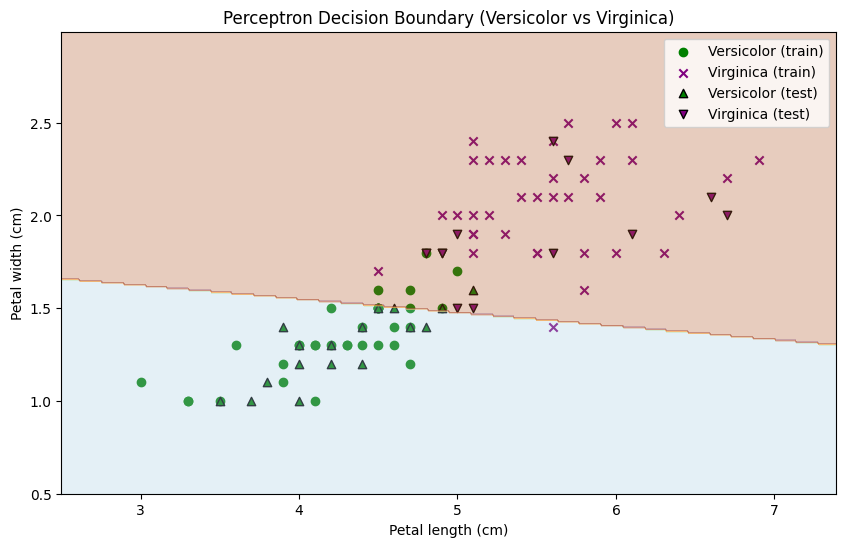

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

iris = load_iris()

# (žiedlapių ilgis ir plotis)
X = iris.data[:, 2:4]
y = iris.target

# Pasirenkame Versicolor (1) ir Virginica (2) klases
X = X[y != 0]  # pašaliname Setosa klasę
y = y[y != 0]

# Kad klasės būtų 0 ir 1, performuojame y reikšmes
y = y - 1  # dabar: Versicolor=0, Virginica=1

# Duomenų padalinimas į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(10, 6))

# Nubraižome treniravimo duomenis
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            color='green', marker='o', label='Versicolor (train)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            color='purple', marker='x', label='Virginica (train)')

# Nubraižome testavimo duomenis
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            color='green', marker='^', edgecolor='k', label='Versicolor (test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='purple', marker='v', edgecolor='k', label='Virginica (test)')

# Sukuriame ir ištreniruojame perceptroną
perceptron = Perceptron(max_iter=100, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Nubrėžiame sprendimo ribą
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
X_try_all = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(X_try_all)
ZZ = Z.reshape(xx.shape)

plt.contourf(xx, yy, ZZ, alpha=0.3, cmap=plt.cm.Paired)

plt.title('Perceptron Decision Boundary (Versicolor vs Virginica)')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()


# Part 2

[('wrong', 17), ('correct', 13)]
[-0.23  1.09]


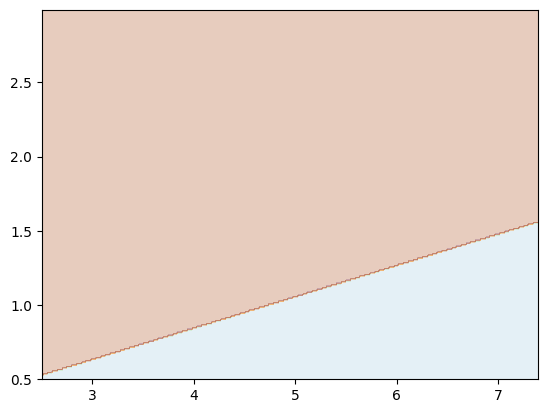

In [15]:
import numpy as np
from collections import Counter

class Perceptron:

    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        return 0 if x < 0 else 1

    def __call__(self, in_data):
        weighted_sum = np.dot(self.weights, in_data)
        return Perceptron.unit_step_function(weighted_sum)

    def fit(self, target_result, calculated_result, in_data):
        in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


    def predict(self, data):
        predictions = []
        for index in range(len(data)):
            predictions.append(int(round(self(data[index]))))
        return predictions

p = Perceptron(weights=[0.1, 0.1], learning_rate=0.3)

for index in range(len(X_train[:,:])):
    p.fit(y_train[index],  p(X_train[index]),  X_train[index])

#evaluation = p.evaluate(X_train, y_train)
#print(evaluation.most_common())
evaluation = p.evaluate(X_test, y_test)
print(evaluation.most_common())
print(p.weights)



Zn = p.predict(X_try_all)
Zn = np.asarray(Zn)
ZZn = Zn.reshape(xx.shape)
plt.contourf(xx, yy, ZZn, alpha=0.3, cmap=plt.cm.Paired)

